In [1]:
import glob
import os
import time
from datetime import datetime, date

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import strat_defs # custom functions
import prep_data

sp_df_files = glob.glob('sp_df_*.csv')
sp_df_latest = max(sp_df_files, key=os.path.getctime)
sp_df_raw = pd.read_csv(sp_df_latest, parse_dates=['Date added'])

stocks_df, wiki_pageviews, ffr_raw, weather, gt_adjusted = prep_data.load_data()

In [2]:
s_date = "2015-07-01"
exclude_vars = ("Open","High","Low","Close","Adj Close","Volume")

initial_train_period = 2140 # 2015-07-01 start predicting in 2024

# Stocks to test
these_dont_work = ['BF.B', 'BRK.B', 'GOOG', 'FOX', 'NWS']
to_test = list(sp_df_raw.loc[sp_df_raw['Date added']<=s_date,'Symbol'])
to_test = [x for x in to_test if x not in these_dont_work]

In [3]:
%%time
strat_bds, strat_mods = {}, {}
for ticker in to_test:
    print(f'\n\033[1m{ticker}\033[0m')
    prepd_data = prep_data.prep_data(
        stocks_df,
        wiki_pageviews,
        ffr_raw,
        weather,
        gt_adjusted,
        config=prep_data.IndicatorConfig(ticker=ticker),
        drop_tickers=True
    )

    df_for_chart = prepd_data.loc[prepd_data['Date']>=s_date].reset_index(drop=True)
    df_for_chart = df_for_chart.drop(columns=[
        col for col in df_for_chart.columns 
        if any(col.startswith(prefix) for prefix in exclude_vars) and col != "Adj Close_"+ticker
    ])
    df_for_chart = df_for_chart.dropna(axis='columns') # drop columns with an na

    print(f'Training on data set with {len(df_for_chart)} rows and {df_for_chart.shape[1]-1} features')
    print("Logit", end=" ")
    start_time = time.time()
    backtested_data,model,score = strat_defs.backtest_strategy(
        data=df_for_chart,
        strategy="Logit",
        target='Adj Close',
        ticker=ticker,
        config=strat_defs.BacktestConfig(),
        initial_train_period=initial_train_period,
        n_jobs=-1
    )
    end_time = time.time()    
    print(f'score = {score}, time = {end_time-start_time}')

    strat_bds[f'{ticker}_Logit'] = backtested_data
    strat_mods[f'{ticker}_Logit'] = model


MMM
Training on data set with 2461 rows and 30 features
Logit score = 0.5308943089430894, time = 13.495912313461304

ABT
Training on data set with 2461 rows and 30 features
Logit score = 0.5219512195121951, time = 7.013761043548584

ABBV
Training on data set with 2461 rows and 30 features
Logit score = 0.5430894308943089, time = 16.54254174232483

ACN
Training on data set with 2461 rows and 30 features
Logit score = 0.5495934959349593, time = 12.544852018356323

ADBE
Training on data set with 2461 rows and 29 features
Logit score = 0.5369918699186992, time = 12.60840392112732

AES
Training on data set with 2461 rows and 30 features
Logit score = 0.5272357723577236, time = 12.415857076644897

AFL
Training on data set with 2461 rows and 30 features
Logit score = 0.5617886178861788, time = 13.336281061172485

A
Training on data set with 2461 rows and 30 features
Logit score = 0.5426829268292683, time = 7.170608043670654

APD
Training on data set with 2461 rows and 30 features
Logit score

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5634146341463414, time = 7.48367166519165

AEE
Training on data set with 2461 rows and 30 features
Logit score = 0.5443089430894309, time = 15.185624837875366

AEP
Training on data set with 2461 rows and 30 features
Logit score = 0.5491869918699187, time = 12.805560111999512

AXP
Training on data set with 2461 rows and 30 features
Logit score = 0.524390243902439, time = 12.634376049041748

AIG
Training on data set with 2461 rows and 30 features
Logit score = 0.5284552845528455, time = 12.872886180877686

AMT
Training on data set with 2461 rows and 29 features
Logit score = 0.5304878048780488, time = 12.6268892288208

AMP
Training on data set with 2461 rows and 30 features
Logit score = 0.5365853658536586, time = 7.6317949295043945

AME
Training on data set with 2461 rows and 30 features
Logit score = 0.5378048780487805, time = 17.346675157546997

AMGN
Training on data set with 2461 rows and 30 features
Logit score = 0.5414634146341464, time = 12.620657920837402

APH
Training 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5329268292682927, time = 14.008044004440308

KMX
Training on data set with 2461 rows and 30 features
Logit score = 0.5276422764227642, time = 7.35468316078186

CCL
Training on data set with 2461 rows and 30 features
Logit score = 0.5186991869918699, time = 9.214185953140259

CAT
Training on data set with 2461 rows and 30 features
Logit score = 0.5199186991869919, time = 7.324726104736328

CBRE
Training on data set with 2461 rows and 30 features
Logit score = 0.5317073170731708, time = 13.566421031951904

COR
Training on data set with 2461 rows and 29 features
Logit score = 0.5264227642276422, time = 7.318397045135498

CNP
Training on data set with 2461 rows and 30 features
Logit score = 0.55, time = 14.22096061706543

CF
Training on data set with 2461 rows and 30 features
Logit score = 0.5146341463414634, time = 7.236649036407471

SCHW
Training on data set with 2461 rows and 30 features
Logit score = 0.5170731707317073, time = 13.930963039398193

CVX
Training on data set with

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5459349593495935, time = 14.123862743377686

STZ
Training on data set with 2461 rows and 30 features
Logit score = 0.5211382113821138, time = 13.696307897567749

GLW
Training on data set with 2461 rows and 30 features
Logit score = 0.5247967479674797, time = 13.997272968292236

COST
Training on data set with 2461 rows and 30 features
Logit score = 0.551219512195122, time = 13.975352048873901

CTRA
Training on data set with 2461 rows and 29 features
Logit score = 0.5471544715447154, time = 7.706604719161987

CCI
Training on data set with 2461 rows and 30 features
Logit score = 0.5296747967479675, time = 14.14012598991394

CSX
Training on data set with 2461 rows and 30 features
Logit score = 0.541869918699187, time = 14.305826902389526

CMI
Training on data set with 2461 rows and 30 features
Logit score = 0.5345528455284553, time = 7.72313380241394

CVS
Training on data set with 2461 rows and 30 features
Logit score = 0.5247967479674797, time = 7.297510862350464

DHR
Training o

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.532520325203252, time = 13.64563798904419

DRI
Training on data set with 2461 rows and 30 features
Logit score = 0.5292682926829269, time = 14.334118843078613

DVA
Training on data set with 2461 rows and 30 features
Logit score = 0.5329268292682927, time = 13.922338008880615

DE
Training on data set with 2461 rows and 30 features
Logit score = 0.5426829268292683, time = 7.455281972885132

DAL
Training on data set with 2461 rows and 30 features
Logit score = 0.5451219512195122, time = 13.836030960083008

DVN
Training on data set with 2461 rows and 30 features
Logit score = 0.5089430894308943, time = 7.481919050216675

DFS
Training on data set with 2461 rows and 30 features
Logit score = 0.5264227642276422, time = 13.918047904968262

DG
Training on data set with 2461 rows and 30 features
Logit score = 0.516260162601626, time = 13.884130716323853

DLTR
Training on data set with 2461 rows and 30 features
Logit score = 0.5227642276422764, time = 7.358195066452026

DOV
Training on 

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


score = 0.5288617886178861, time = 14.015257835388184

DTE
Training on data set with 2461 rows and 30 features
Logit score = 0.5516260162601626, time = 17.024369955062866

DUK
Training on data set with 2461 rows and 30 features
Logit score = 0.5422764227642276, time = 13.687320709228516

EMN
Training on data set with 2461 rows and 30 features
Logit score = 0.5186991869918699, time = 12.922199010848999

ETN
Training on data set with 2461 rows and 30 features
Logit score = 0.5345528455284553, time = 13.173737049102783

EBAY
Training on data set with 2461 rows and 29 features
Logit score = 0.5252032520325203, time = 12.775582075119019

ECL
Training on data set with 2461 rows and 30 features
Logit score = 0.532520325203252, time = 12.660806894302368

EIX
Training on data set with 2461 rows and 30 features
Logit score = 0.5288617886178861, time = 12.526042222976685

EW
Training on data set with 2461 rows and 30 features
Logit score = 0.5223577235772358, time = 12.981272220611572

EA
Trainin

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


score = 0.5308943089430894, time = 12.619046926498413

FAST
Training on data set with 2461 rows and 29 features
Logit score = 0.5284552845528455, time = 12.6112380027771

FDX
Training on data set with 2461 rows and 30 features
Logit score = 0.5252032520325203, time = 12.792402744293213

FIS
Training on data set with 2461 rows and 30 features
Logit score = 0.5345528455284553, time = 12.969640970230103

FITB
Training on data set with 2461 rows and 29 features
Logit score = 0.5349593495934959, time = 7.1818528175354

FE
Training on data set with 2461 rows and 30 features
Logit score = 0.5483739837398374, time = 13.642930030822754

FI
Training on data set with 2461 rows and 30 features
Logit score = 0.5483739837398374, time = 13.8051598072052

F
Training on data set with 2461 rows and 30 features
Logit score = 0.5300813008130081, time = 15.70060110092163

BEN
Training on data set with 2461 rows and 30 features
Logit score = 0.5223577235772358, time = 7.205008268356323

FCX
Training on data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


score = 0.5341463414634147, time = 13.771278858184814

MAR
Training on data set with 2461 rows and 30 features
Logit score = 0.5321138211382114, time = 14.421396970748901

MMC
Training on data set with 2461 rows and 29 features
Logit score = 0.5532520325203252, time = 6.992483854293823

MLM
Training on data set with 2461 rows and 30 features
Logit score = 0.517479674796748, time = 13.5594801902771

MAS
Training on data set with 2461 rows and 30 features
Logit score = 0.532520325203252, time = 14.064713954925537

MA
Training on data set with 2461 rows and 30 features
Logit score = 0.5495934959349593, time = 14.10061001777649

MKC
Training on data set with 2461 rows and 30 features
Logit 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5398373983739837, time = 13.774349212646484

MCD
Training on data set with 2461 rows and 30 features
Logit score = 0.5398373983739837, time = 14.10481882095337

MCK
Training on data set with 2461 rows and 30 features
Logit 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5386178861788617, time = 13.585093975067139

MDT
Training on data set with 2461 rows and 30 features
Logit score = 0.5317073170731708, time = 16.011157989501953

MRK
Training on data set with 2461 rows and 30 features
Logit score = 0.5207317073170732, time = 14.477052927017212

META
Training on data set with 2461 rows and 29 features
Logit score = 0.5296747967479675, time = 13.745176076889038

MET
Training on data set with 2461 rows and 30 features
Logit score = 0.5369918699186992, time = 13.845974922180176

MCHP
Training on data set with 2461 rows and 30 features
Logit score = 0.541869918699187, time = 13.831722974777222

MU
Training on data set with 2461 rows and 30 features
Logit score = 0.5357723577235772, time = 7.27031397819519

MSFT
Training on data set with 2461 rows and 30 features
Logit score = 0.5451219512195122, time = 13.68316125869751

MHK
Training on data set with 2461 rows and 30 features
Logit score = 0.5077235772357723, time = 13.591542959213257

TAP
Trainin

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5451219512195122, time = 15.575065851211548

LUV
Training on data set with 2461 rows and 30 features
Logit score = 0.5337398373983739, time = 13.849169731140137

SWK
Training on data set with 2461 rows and 30 features
Logit score = 0.5146341463414634, time = 14.434340000152588

SBUX
Training on data set with 2461 rows and 30 features
Logit score = 0.5211382113821138, time = 7.388948917388916

STT
Training on data set with 2461 rows and 30 features
Logit score = 0.5231707317073171, time = 13.597986698150635

SYK
Training on data set with 2461 rows and 30 features
Logit 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5341463414634147, time = 13.914441108703613

SYY
Training on data set with 2461 rows and 30 features
Logit score = 0.5475609756097561, time = 13.5485360622406

TPR
Training on data set with 2461 rows and 29 features
Logit score = 0.5215447154471544, time = 13.658679962158203

TGT
Training on data set with 2461 rows and 30 features
Logit score = 0.5321138211382114, time = 13.66061282157898

TEL
Training on data set with 2461 rows and 30 features
Logit score = 0.5272357723577236, time = 15.001754999160767

TXN
Training on data set with 2461 rows and 30 features
Logit score = 0.5646341463414634, time = 7.193037986755371

TXT
Training on data set with 2461 rows and 30 features
Logit score = 0.5345528455284553, time = 7.356920003890991

TMO
Training on data set with 2461 rows and 30 features
Logit score = 0.5475609756097561, time = 14.009907960891724

TJX
Training on data set with 2461 rows and 30 features
Logit score = 0.524390243902439, time = 7.35724401473999

TSCO
Training on 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5239837398373983, time = 14.039424180984497

VTR
Training on data set with 2461 rows and 29 features
Logit score = 0.5422764227642276, time = 13.615936994552612

VRSN
Training on data set with 2461 rows and 30 features
Logit score = 0.5426829268292683, time = 16.187235116958618

VZ
Training on data set with 2461 rows and 30 features
Logit score = 0.5207317073170732, time = 13.539626836776733

VRTX
Training on data set with 2461 rows and 30 features
Logit score = 0.5308943089430894, time = 7.492475986480713

VTRS
Training on data set with 2461 rows and 29 features
Logit score = 0.5073170731707317, time = 14.74190068244934

V
Training on data set with 2461 rows and 30 features
Logit score = 0.5552845528455285, time = 13.999470949172974

VMC
Training on data set with 2461 rows and 30 features
Logit score = 0.5272357723577236, time = 7.425717115402222

GWW
Training on data set with 2461 rows and 30 features
Logit score = 0.5296747967479675, time = 13.614509105682373

WBA
Training

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

score = 0.5390243902439025, time = 7.282435178756714

WEC
Training on data set with 2461 rows and 29 features
Logit score = 0.5426829268292683, time = 13.74976110458374

WFC
Training on data set with 2461 rows and 30 features
Logit score = 0.525609756097561, time = 14.265905141830444

WELL
Training on data set with 2461 rows and 29 features
Logit score = 0.5459349593495935, time = 13.5156090259552

WDC
Training on data set with 2461 rows and 30 features
Logit score = 0.5142276422764228, time = 13.989117860794067

WY
Training on data set with 2461 rows and 30 features
Logit score = 0.5252032520325203, time = 13.76149582862854

WMB
Training on data set with 2461 rows and 30 features
Logit score = 0.5402439024390244, time = 7.443006992340088

WYNN
Training on data set with 2461 rows and 30 features
Logit score = 0.5373983739837398, time = 7.586994886398315

XEL
Training on data set with 2461 rows and 30 features
Logit score = 0.5479674796747968, time = 15.653669118881226

XYL
Training on 

In [4]:
prepd_data = prep_data.prep_data(
    stocks_df,
    wiki_pageviews,
    ffr_raw,
    weather,
    gt_adjusted,
    config=prep_data.IndicatorConfig(ticker="SPY"),
    drop_tickers=True
)

df_for_chart = prepd_data.loc[prepd_data['Date']>=s_date].reset_index(drop=True)

spy_data,spy_model,spy_score = strat_defs.backtest_strategy(
    data=df_for_chart.dropna(axis='columns'),
    strategy="Hold",
    target='Adj Close',
    ticker="SPY",
    config=strat_defs.BacktestConfig(),
    initial_train_period=initial_train_period,
    n_jobs=-1
)

In [24]:
df_to_build = strat_bds[to_test[0]+"_Logit"][['Date']] # start with just date column

# Get results for all tickers in to_test
for ticker in to_test:
    df = strat_bds[ticker+"_Logit"][['Date','Daily_Return','proba_1']]
    df = df.rename(columns={'Daily_Return': f'Daily_Return_{ticker}', 'proba_1': f'{ticker}_proba_1Logit'})
    df_to_build = df_to_build.merge(df,on='Date')

proba_cols = [col for col in df_to_build.columns if 'proba_1' in col]

# filter to after training period (avoid all rows nan error)
df_to_build = df_to_build[initial_train_period:]

df_to_build['proba_1max'] = df_to_build[proba_cols].max(axis=1) # max value acoss all proba_1 cols

df_to_build['proba_1max_col'] = df_to_build[proba_cols].idxmax(axis=1,skipna=True) # column name that proba_1max is in
df_to_build['proba_1max_ticker'] = "Daily_Return_"+df_to_build['proba_1max_col'].str.split('_').str[0] # daily return column name of relevant ticker

# Daily return value of ticker with highest predicted probability of increase
df_to_build['proba_1max_ticker_Daily_return'] = df_to_build.apply(
    lambda row: row[row['proba_1max_ticker']] if pd.notnull(row['proba_1max_col']) else row['Daily_Return_SPY'], axis=1
)

df_to_build['Strategy_Return'] = df_to_build['proba_1max_ticker_Daily_return']

df_to_build.loc[df_to_build['proba_1max'] < 0.7, 'Strategy_Return'] = df_to_build['Daily_Return_SPY']

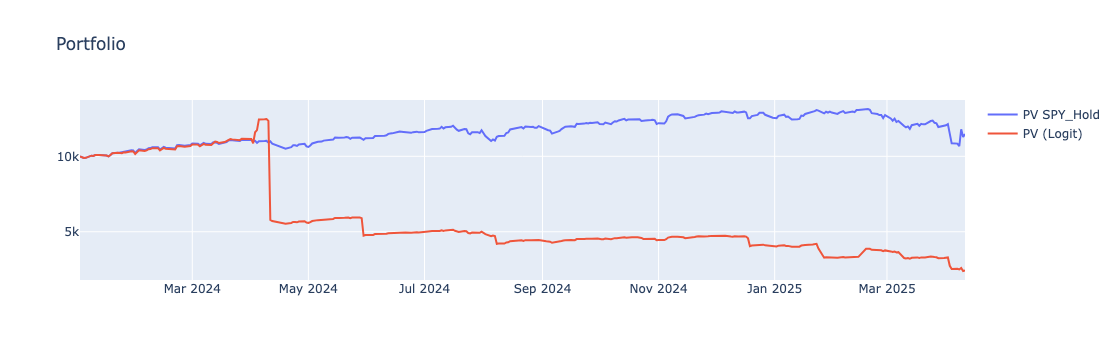

In [30]:
initial_capital = 10000 # scalar

fig = go.Figure()

df = spy_data[initial_train_period:].copy()
df.loc[initial_train_period, 'Strategy_Return'] = 0
df['Portfolio_Value'] = (1 + df['Strategy_Return']).cumprod() * initial_capital
fig.add_trace(go.Scatter(x=df['Date'], y=df['Portfolio_Value'], mode='lines', name='PV SPY_Hold'))

df_to_build.loc[initial_train_period, 'Strategy_Return'] = 0
df_to_build['Portfolio_Value'] = (1 + df_to_build['Strategy_Return']).cumprod() * initial_capital
fig.add_trace(go.Scatter(x=df_to_build['Date'], y=df_to_build['Portfolio_Value'], mode='lines', name="PV (Logit)"))

fig.update_layout(title="Portfolio")
fig.show()